In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# TASK-1 
df = pd.read_csv('./dataset/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#TASK-2.A
def MyLabelEncoder(column_name, df) :
    unique_vals = df[column_name].unique()

    labelEncoder = {}
    i = 0
    for val in unique_vals:
        labelEncoder[val] = i
        i += 1
    
    return labelEncoder;


In [8]:
labelEncoding_ocean = MyLabelEncoder('ocean_proximity', df)
df['ocean_proximity'] = df['ocean_proximity'].map(labelEncoding_ocean)
df.dropna(inplace=True)

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [21]:
y_data = df['median_house_value'].values.reshape(-1)  # column vector
x_data = df.drop(columns=['median_house_value']).values  # numpy 2D array

In [19]:
x_data.shape, y_data.shape

((20433, 10), (20433,))

In [24]:
x_data = np.c_[np.ones((x_data.shape[0], 1)), x_data]

In [25]:
x_data.shape, y_data.shape

((20433, 10), (20433,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.8)

In [23]:
u = x_train.mean(axis=0)    
sigma = x_train.std(axis=0) 

x_train = (x_train - u) / sigma
x_test  = (x_test - u) / sigma

In [27]:
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]

In [28]:
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

In [29]:
x_train.shape

(16346, 10)

In [28]:
# TASK-2.B
class OLSLinearRegression:
    def __init__(self):
        self.loss_e = []

    def fit(self, X, y):
        theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

        self.w = theta          
        self.loss_e = [self.loss(X, self.w, y)]

    def hypothesis(self, X, w):
        return X.dot(w)

    def loss(self, X, w, y):
        ypred = self.hypothesis(X, w)
        return np.mean((ypred - y) ** 2)

    def predict(self, X):
        return self.hypothesis(X, self.w)


In [29]:
clf = OLSLinearRegression()

In [30]:
clf.fit(x_train, y_train)

In [31]:
y_pred_OLS = clf.predict(x_test)

In [33]:
r2_score(y_test, y_pred_OLS)

0.6435575755809122

In [45]:
# TASK-2.C.1
def hypothesis(X, w):
    return X.dot(w)


def loss(X, w, y):
        ypred = hypothesis(X, w)
        return np.mean((ypred - y) ** 2)

In [116]:
# TASK-2.C.2
def gradientDescent(X, y, lr=0.01, epochs=1000):
    w = np.zeros(shape=(X.shape[1],))
    loss_e = [loss(X, w, y)]
    
    for e in range(epochs):
        ypred = hypothesis(X, w)
    
        grads = np.mean(X.T * (ypred-y),axis =1)
    
        w = w - lr * grads
    
        loss_e.append(loss(X, w, y))
        
    return w, loss_e

In [61]:
w, loss_e = gradientDescent(x_train, y_train)

In [62]:
y_pred = hypothesis(x_test, w)

In [63]:
r2_score(y_test, y_pred)

0.619102830677215

In [64]:
#TASK-2.E
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred_2 = clf.predict(x_test)

In [66]:
r2_score(y_test, y_pred_2)

0.6435575755809124

-> Method vs Accuracy
- Normal Equation Method -> 64.35%
- Gradient Descent -> 61.91% (1000 epochs)
- Scikit-learn API -> 64.35%

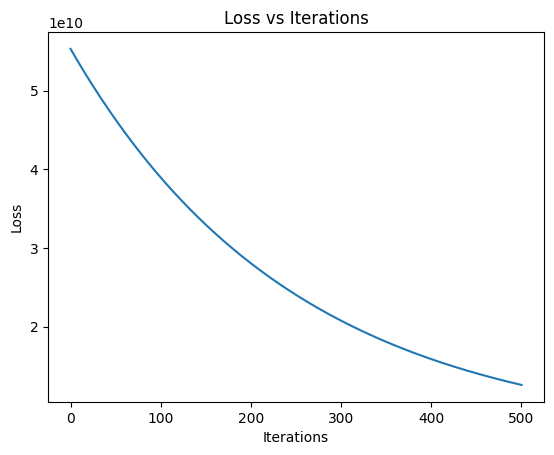

In [72]:
#TASK-2.F

w, loss_e = gradientDescent(x_train, y_train, 0.002, 500)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig('./Images/ScaledFeatures1')

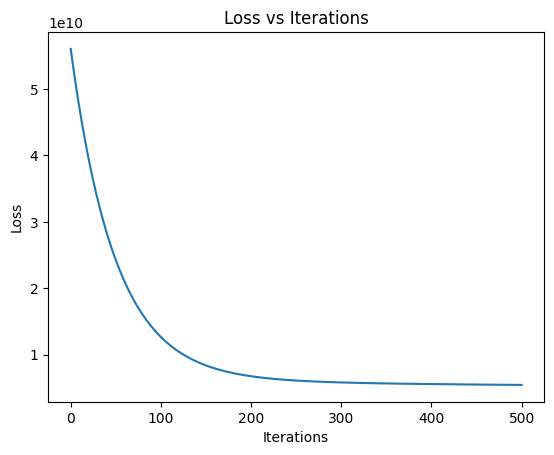

In [97]:
w2, loss_e = gradientDescent(x_train, y_train, 0.01, 500)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig('./Images/ScaledFeatures2')

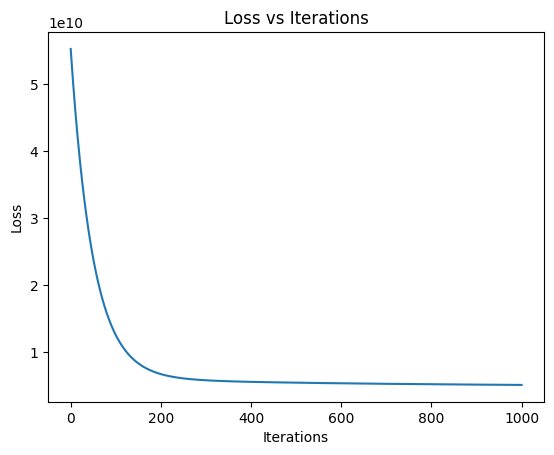

In [74]:
w, loss_e = gradientDescent(x_train, y_train, 0.01, 1000)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig('./Images/ScaledFeatures3')

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.8)
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]

C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\138503782.py:8: RuntimeWarning: overflow encountered in square
  return np.mean((ypred - y) ** 2)
C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\549148045.py:9: RuntimeWarning: invalid value encountered in multiply
  grads = np.mean(X.T * (ypred-y),axis =1)
C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\549148045.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * grads


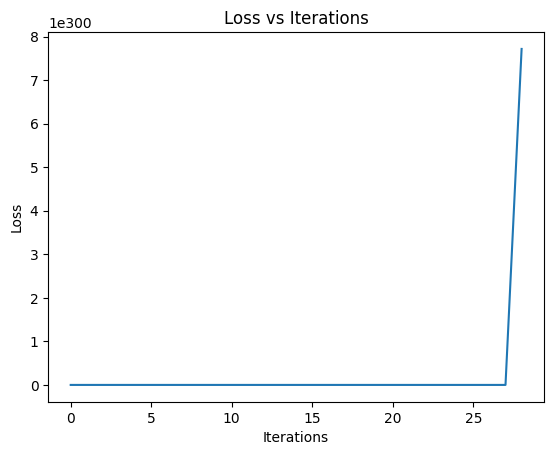

In [78]:
w, loss_e = gradientDescent(x_train, y_train, 0.01, 500)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig('./Images/UnscaledFeatures1')

C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\138503782.py:8: RuntimeWarning: overflow encountered in square
  return np.mean((ypred - y) ** 2)
C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\549148045.py:9: RuntimeWarning: invalid value encountered in multiply
  grads = np.mean(X.T * (ypred-y),axis =1)
C:\Users\gupta\AppData\Local\Temp\ipykernel_4100\549148045.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * grads


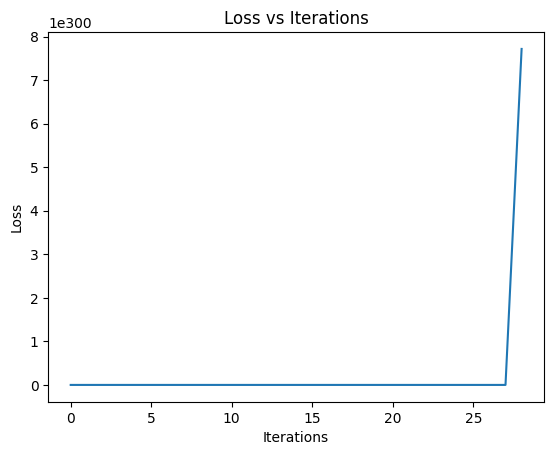

In [79]:
w, loss_e = gradientDescent(x_train, y_train, 0.01, 1000)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.savefig('./Images/UnscaledFeatures2')

In [98]:
def gradientDescent(X, y, X_val, y_val, lr=0.01, epochs=1000):
    w = np.zeros(shape=(X.shape[1],))
    loss_e = [loss(X, w, y)]
    val_loss_e = [loss(X_val, w, y_val)]
    
    for e in range(epochs):
        ypred = hypothesis(X, w)
    
        grads = np.mean(X.T * (ypred-y),axis =1)
    
        w = w - lr * grads
    
        loss_e.append(loss(X, w, y))
        val_loss_e.append(loss(X_val, w, y_val))
        
    return w, loss_e, val_loss_e

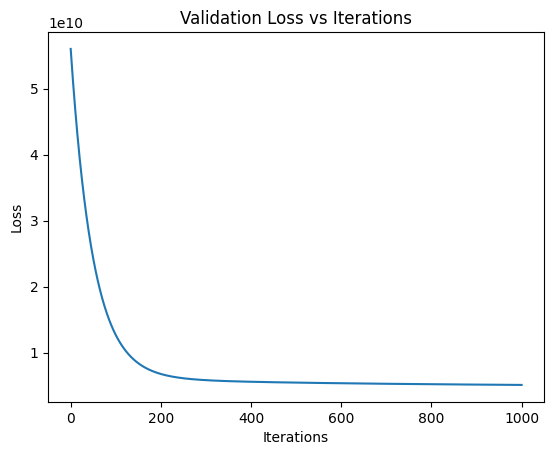

In [89]:
w1, loss_e, val_loss_e = gradientDescent(x_train, y_train, x_test, y_test, 0.01, 1000)
plt.plot(np.arange(len(loss_e)), loss_e)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Loss vs Iterations')
plt.savefig('./Images/ScaledFeatures_val_loss')

In [92]:
def loss_surface_2D(X, y, learned_w, learned_w0, idx1=0, idx2=1, 
                    w1_range=(-1, 1), w2_range=(-1, 1), steps=50):
    w_fixed = learned_w.copy()
    W1 = np.linspace(w1_range[0], w1_range[1], steps)
    W2 = np.linspace(w2_range[0], w2_range[1], steps)
    Loss = np.zeros((steps, steps))

    for i in range(steps):
        for j in range(steps):
            w_temp = w_fixed.copy()
            w_temp[idx1] = W1[i]
            w_temp[idx2] = W2[j]
            y_pred = X.dot(w_temp) + learned_w0
            Loss[i, j] = np.mean((y_pred - y) ** 2)

    # plot surface
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection="3d")
    W1g, W2g = np.meshgrid(W1, W2)
    ax.plot_surface(W1g, W2g, Loss.T, cmap="viridis")
    ax.set_xlabel(f"W{idx1}")
    ax.set_ylabel(f"W{idx2}")
    ax.set_zlabel("Loss")
    plt.show()


In [102]:
def r2_score_manual(y_true, y_pred):

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2

In [112]:
#TASK-2.G
#ols 
clf = OLSLinearRegression()
clf.fit(x_train, y_train)
y_pred_OLS = clf.predict(x_test)

In [113]:
#MSE
clf.loss(x_test, clf.w, y_test)

4812143136.362933

In [114]:
rmse = np.sqrt(clf.loss(x_test, clf.w, y_test))
print("RMSE:", rmse)

RMSE: 69369.61248531617


In [115]:
r2_score_manual(y_test, clf.predict(x_test))

0.6215855550945587

In [118]:
#gradientDescent
w, loss_e = gradientDescent(x_train, y_train)

In [120]:
#mse
loss(x_test, w, y_test)

5083821204.864327

In [121]:
rmse = np.sqrt(loss(x_test, w, y_test))
print("RMSE:", rmse)

RMSE: 71300.9200842761


In [122]:
r2_score_manual(y_test, hypothesis(x_test, w))

0.60022149700824

In [30]:
# Scikit - Learn Api
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 4717593521.465182
RMSE: 68684.74009170583
R² Score: 0.6483210788213164
